Parameter estimations:  
http://nbviewer.jupyter.org/github/JuliaDiffEq/DiffEqBenchmarks.jl/blob/master/ParameterEstimation/LorenzParameterEstimation.ipynb  
http://nbviewer.jupyter.org/github/JuliaDiffEq/DiffEqBenchmarks.jl/blob/master/ParameterEstimation/LotkaVolterraParameterEstimation.ipynb  
http://nbviewer.jupyter.org/github/JuliaDiffEq/DiffEqBenchmarks.jl/blob/master/ParameterEstimation/DiffEqBayesLotkaVolterra.ipynb  

DiffEqBayes code:  
https://github.com/JuliaDiffEq/DiffEqBayes.jl/blob/master/src/dynamichmc_inference.jl  

Gradient:  
https://github.com/tpapp/DiffWrappers.jl
http://docs.juliadiffeq.org/latest/analysis/sensitivity.html  

Set up a ODE problem (a Lotka Volterra model)

In [1]:
using DifferentialEquations, ParameterizedFunctions, ODE, ODEInterfaceDiffEq, LSODA

f = @ode_def LotkaVolterra begin
  dx = a*x - b*x*y
  dy = -c*y + d*x*y
end a b c d

p = [1.5,1.0,3.0,1.0]
prob = ODEProblem(f,[1.0;1.0],(0.0,10.0),p)

abstols = 1./10.^(6:13)
reltols = 1./10.^(3:10);
sol = solve(prob,Vern7(),abstol=1/10^14,reltol=1/10^14)
test_sol = TestSolution(sol)
using Plots; gr()

Plots.GRBackend()

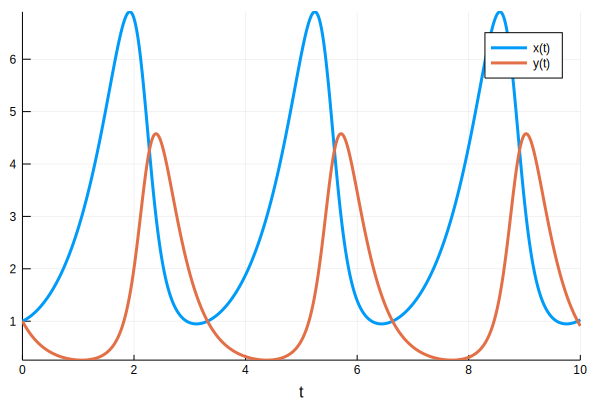

In [2]:
sol = solve(prob,Vern7(),abstol=1/10^14,reltol=1/10^14)
plot(sol)

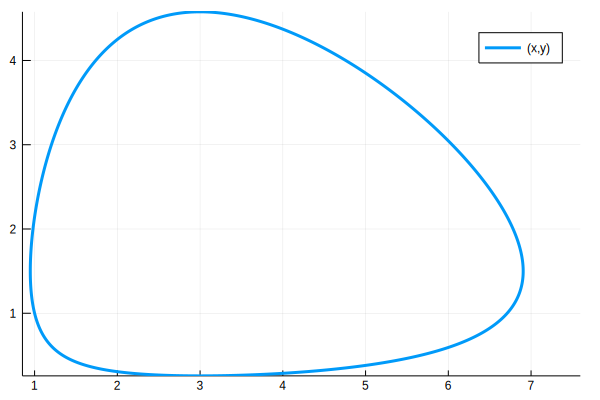

In [3]:
plot(sol,vars=(1,2))

Change parameter and generate dynamic (i.e., solving the ODE)

In [ ]:
prob2 = problem_new_parameters(prob, [1.0,1.5,3.0,1.0])
sol = solve(prob2, Tsit5())

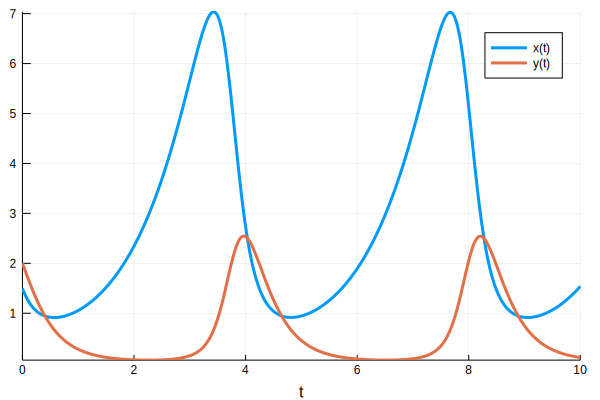

In [21]:
function problem_new_parameters2(prob::ODEProblem,u0,p;kwargs...)
  uEltype = eltype(p)
  tspan = (uEltype(prob.tspan[1]),uEltype(prob.tspan[2]))
  ODEProblem{isinplace(prob)}(prob.f,u0,tspan,p,prob.problem_type;
  callback = prob.callback, mass_matrix = prob.mass_matrix,
  kwargs...)
end

prob2 = problem_new_parameters2(prob, [1.5,2.], [1.0,1.5,3.0,1.0])
sol = solve(prob2, Tsit5())
plot(sol)

In [4]:
function lotkavolterra(du,u,p,t)
 du[1] = p[1]*u[1]-p[2]*u[1]*u[2]
 du[2] = -p[3]*u[2]+p[4]*u[1]*u[2]
end

lotkavolterra (generic function with 1 method)

In [5]:
u0 = [1.0;1.0]
tspan = (0.0,10.0)
prob2 = ODEProblem(lotkavolterra,u0,tspan,p)
sol2 = solve(prob2);

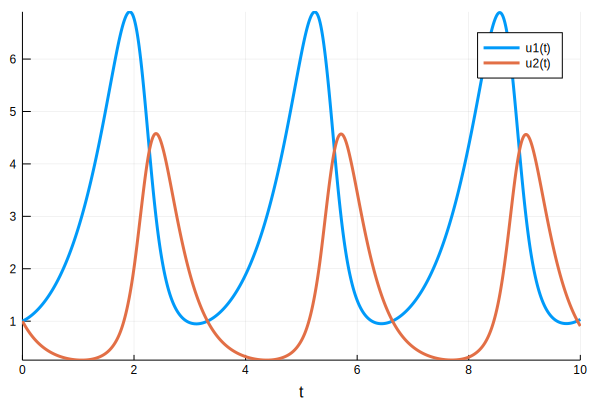

In [6]:
plot(sol2)

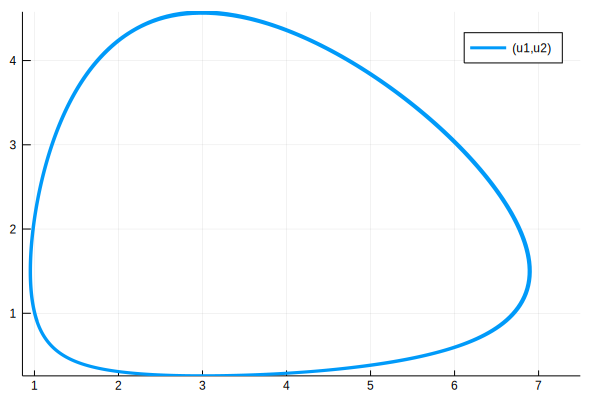

In [7]:
plot(sol2,vars=(1,2))

In [8]:
u0 = [.5, 0.25]
tspan = (0.0,100.0)
p2 = [1.5, 2.5, 1.75, 1.75, .01]
prob2 = ODEProblem(lotkavolterra,u0,tspan,p2)
sol2 = solve(prob2,Vern7(),abstol=1/10^14,reltol=1/10^14);

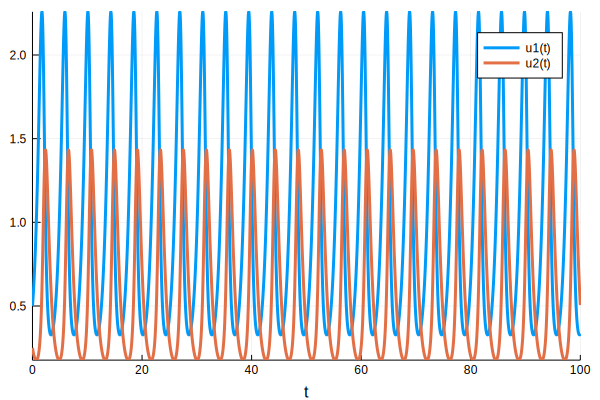

In [9]:
plot(sol2)

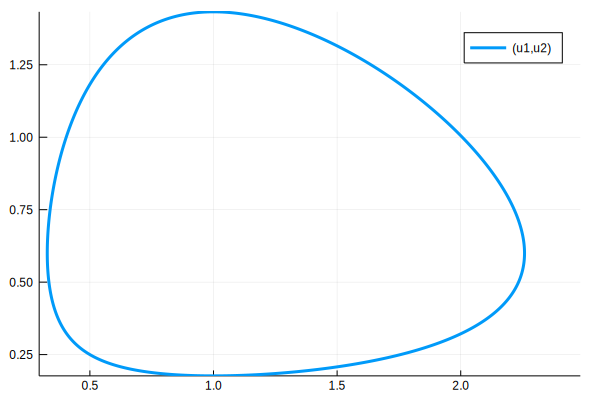

In [10]:
plot(sol2,vars=(1,2))